In [1]:
#loading required packages
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# importing data - train data set
df3=pd.read_csv("/content/train.csv")
df3.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [3]:
# importing data - test data set
final_test=pd.read_csv("/content/final_test.csv")
final_test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


In [4]:
# appending data set training and test
df1=df3.append(final_test)
df1.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [5]:
# total rows
len(df1)

550275

creating dummy data frame to map the month of sourcing ensuring order of the month 

In [6]:
# initialize list of lists
data = [['Jul-20', 1,2020], ['Aug-20', 2,2020], ['Sep-20', 3,2020],['Oct-20', 4,2020],['Nov-20', 5,2020],['Dec-20', 6,2020],['Jan-21', 7,2021],['Feb-21', 8,2021],['Mar-21', 9,2021],['Apr-21', 10,2021],['May-21', 11,2021],
        ['Jun-21', 12,2021]]
 
# Create the mapping table
df = pd.DataFrame(data, columns = ['Month of Sourcing', 'month_no','year'])

# joining the mapping table with df1
df2=pd.merge(df1,df,how='inner',on='Month of Sourcing')
df2.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,month_no,year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16,11,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,May-21,148.40,11,2021
2,NTM1,X2,A30,RETAIL,Small,Powder,May-21,41.04,11,2021
3,NTM1,X1,A10,DIRECT,Large,Powder,May-21,156.79,11,2021
4,NTM1,X1,A2,ECOM,Small,Powder,May-21,174.83,11,2021


#Exploratory data analysis

Let's try to visualize data for better data understanding since data is time series format we can use multiple line chart to visualize data at different dimensions

Try to group the data my month wise and at different categorical types. More of Understanding the data set

**Product** **Type**

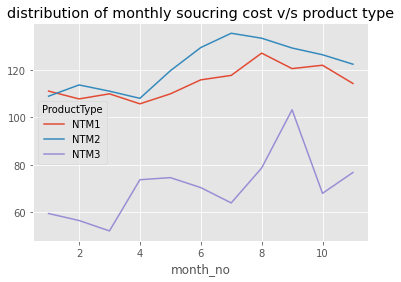

In [ ]:
# grouping data by month and by product type
# visualizing data by product type (one in avg) 
df2.groupby(['month_no','ProductType'])['Sourcing Cost'].mean().unstack().plot(title="distribution of monthly soucring cost v/s product type")

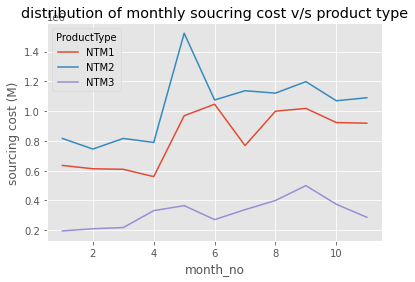

In [ ]:
# visualizing data by product type (one in M) 
df2.groupby(['month_no','ProductType'])['Sourcing Cost'].sum().unstack().plot(title="distribution of monthly soucring cost v/s product type",ylabel="sourcing cost (M)")

Inference: Porduct type NTM2 has highest soucring cost
1. could see drastic spike in 5th month for product NTM2
2. and cost drop after that. and the curve looks flat
3. for NTM3 alone we could see slight increase in the cost

#**Manufactuer**

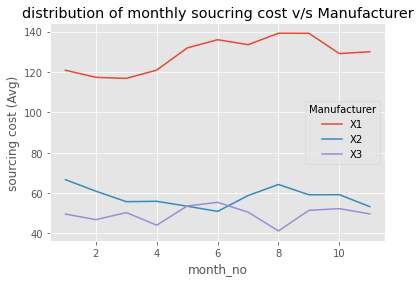

In [ ]:
# grouping data by month and by Manufacturer
# visualizing data by Manufacturer (one in avg) 
df2.groupby(['month_no','Manufacturer'])['Sourcing Cost'].mean().unstack().plot(title="distribution of monthly soucring cost v/s Manufacturer",ylabel="sourcing cost (Avg)")

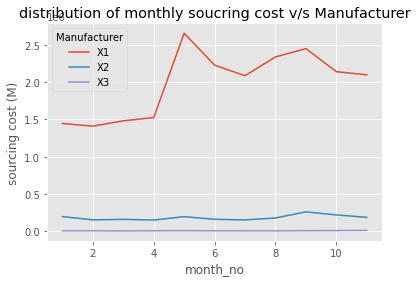

In [ ]:
# visualizing data by Manufacturer (one in M) 
df2.groupby(['month_no','Manufacturer'])['Sourcing Cost'].sum().unstack().plot(title="distribution of monthly soucring cost v/s Manufacturer",ylabel="sourcing cost (M)")

Inference: with respect to manufacturer we could see that X1 has highest trend for rest of the manufacturers are low 
we could see increment in the 5th month that is coming from manufacturer X1

#**Sourcing** **Channel**

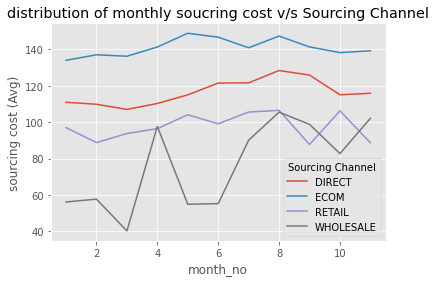

In [ ]:
# grouping data by month and by Sourcing Channel
# visualizing data by Sourcing Channel (one in avg) 
df2.groupby(['month_no','Sourcing Channel'])['Sourcing Cost'].mean().unstack().plot(title="distribution of monthly soucring cost v/s Sourcing Channel",ylabel="sourcing cost (Avg)")

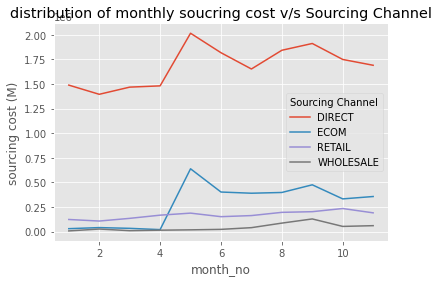

In [ ]:
# visualizing data bySourcing Channel (one in M) 
df2.groupby(['month_no','Sourcing Channel'])['Sourcing Cost'].sum().unstack().plot(title="distribution of monthly soucring cost v/s Sourcing Channel",ylabel="sourcing cost (M)")

Inference: most of the products sells very high cost at direct channel
1. when we try to compare the charts in millions and in average we can see that avg sourcing cost for ecom high and for direct channel is in second.
2. we can see clear change in the trend upside down when dealing with absolute numbers
3. there could be more anamolies/outlier data points in the direct channel and for ecom channel let us try to find out in the further outlier treatment analysis

#**Product** **Size**

In [ ]:
# grouping data by month and by Product Size
# visualizing data by Product Size (one in avg) 
df2.groupby(['month_no','Product Size'])['Sourcing Cost'].mean().unstack().plot(title="distribution of monthly soucring cost v/s Product Size",ylabel="sourcing cost (Avg)")

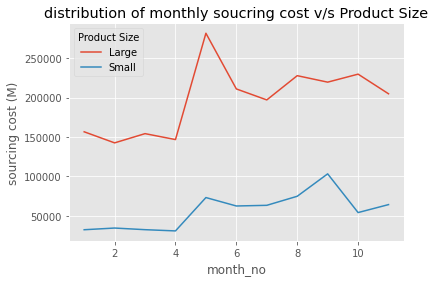

In [ ]:
# visualizing data by Product Size (one in M) 
df2.groupby(['month_no','Product Size'])['Sourcing Cost'].sum().unstack().plot(title="distribution of monthly soucring cost v/s Product Size",ylabel="sourcing cost (M)")

Inference: when we try to compare both of the charts it shows different patterns and trend, so it is clear indication that anamolies is coming from extra large products we observe spike in  4th month. when we deal with absolute raw numbers we couldn't observe that. the most of the transactions/products are large. clearly this will adverse effects while training the model

#**Product** **Type**

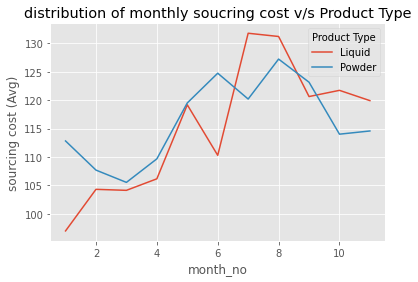

In [ ]:
# grouping data by month and by Product Type
# visualizing data by Product Type (one in avg) 
df2.groupby(['month_no','Product Type'])['Sourcing Cost'].mean().unstack().plot(title="distribution of monthly soucring cost v/s Product Type",ylabel="sourcing cost (Avg)")

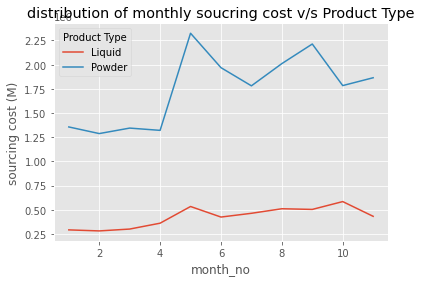

In [ ]:
# visualizing data by Product Type (one in M) 
df2.groupby(['month_no','Product Type'])['Sourcing Cost'].sum().unstack().plot(title="distribution of monthly soucring cost v/s Product Type",ylabel="sourcing cost (M)")

Inference: Most of the products are powder type ones. we can see cost incurred is high for powder products type, 
1. spike in 5th month (possibly a outlier) - need to investigate what could be the reason for that
2. on the average chart from 6 th to 7 month there is spike in the average - need to investigate what could be the reason for that (possible outliers)

we could see there is lots of change in the trend when dealing with absolute raw numbers and summarized ones so this dataset has lots of anamolies and outliers.
need to figure out how to identify them and/or can be removed from the model or not 
one way to smoothen the dataset actually

#**Building ML model after outlier treatments**

since all independent variables are categorical, converting all the categorical variables to numeric variables using label encoder


In [8]:
# labelencoder for coverting/coding categorical to numerical
labelencoder = LabelEncoder()
# coding numerical values for ProductType
df2['ProductType'] = labelencoder.fit_transform(df2['ProductType'])
df2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,month_no,year
0,2,X1,A28,WHOLESALE,Large,Powder,May-21,10.16,11,2021
1,1,X1,A9,DIRECT,Large,Powder,May-21,148.40,11,2021
2,0,X2,A30,RETAIL,Small,Powder,May-21,41.04,11,2021
3,0,X1,A10,DIRECT,Large,Powder,May-21,156.79,11,2021
4,0,X1,A2,ECOM,Small,Powder,May-21,174.83,11,2021
...,...,...,...,...,...,...,...,...,...,...
550267,2,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57,12,2021
550268,2,X1,A8,DIRECT,Large,Powder,Jun-21,114.57,12,2021
550269,2,X1,A8,DIRECT,Small,Powder,Jun-21,111.26,12,2021
550270,2,X2,A20,DIRECT,Large,Powder,Jun-21,32.32,12,2021


In [9]:
# coding numerical values for Area Code
df2['Manufacturer'] = labelencoder.fit_transform(df2['Manufacturer'])
df2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,month_no,year
0,2,0,A28,WHOLESALE,Large,Powder,May-21,10.16,11,2021
1,1,0,A9,DIRECT,Large,Powder,May-21,148.40,11,2021
2,0,1,A30,RETAIL,Small,Powder,May-21,41.04,11,2021
3,0,0,A10,DIRECT,Large,Powder,May-21,156.79,11,2021
4,0,0,A2,ECOM,Small,Powder,May-21,174.83,11,2021
...,...,...,...,...,...,...,...,...,...,...
550267,2,0,A44,DIRECT,Small,Liquid,Jun-21,89.57,12,2021
550268,2,0,A8,DIRECT,Large,Powder,Jun-21,114.57,12,2021
550269,2,0,A8,DIRECT,Small,Powder,Jun-21,111.26,12,2021
550270,2,1,A20,DIRECT,Large,Powder,Jun-21,32.32,12,2021


In [10]:
# coding numerical values for Area Code
df2['Area Code'] = labelencoder.fit_transform(df2['Area Code'])
df2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,month_no,year
0,2,0,19,WHOLESALE,Large,Powder,May-21,10.16,11,2021
1,1,0,44,DIRECT,Large,Powder,May-21,148.40,11,2021
2,0,1,22,RETAIL,Small,Powder,May-21,41.04,11,2021
3,0,0,1,DIRECT,Large,Powder,May-21,156.79,11,2021
4,0,0,11,ECOM,Small,Powder,May-21,174.83,11,2021
...,...,...,...,...,...,...,...,...,...,...
550267,2,0,37,DIRECT,Small,Liquid,Jun-21,89.57,12,2021
550268,2,0,43,DIRECT,Large,Powder,Jun-21,114.57,12,2021
550269,2,0,43,DIRECT,Small,Powder,Jun-21,111.26,12,2021
550270,2,1,12,DIRECT,Large,Powder,Jun-21,32.32,12,2021


In [11]:
# coding numerical values for Sourcing Channel
df2['Sourcing Channel'] = labelencoder.fit_transform(df2['Sourcing Channel'])
df2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,month_no,year
0,2,0,19,3,Large,Powder,May-21,10.16,11,2021
1,1,0,44,0,Large,Powder,May-21,148.40,11,2021
2,0,1,22,2,Small,Powder,May-21,41.04,11,2021
3,0,0,1,0,Large,Powder,May-21,156.79,11,2021
4,0,0,11,1,Small,Powder,May-21,174.83,11,2021
...,...,...,...,...,...,...,...,...,...,...
550267,2,0,37,0,Small,Liquid,Jun-21,89.57,12,2021
550268,2,0,43,0,Large,Powder,Jun-21,114.57,12,2021
550269,2,0,43,0,Small,Powder,Jun-21,111.26,12,2021
550270,2,1,12,0,Large,Powder,Jun-21,32.32,12,2021


In [12]:
# coding numerical values for Product Size
df2['Product Size'] = labelencoder.fit_transform(df2['Product Size'])
df2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,month_no,year
0,2,0,19,3,1,Powder,May-21,10.16,11,2021
1,1,0,44,0,1,Powder,May-21,148.40,11,2021
2,0,1,22,2,2,Powder,May-21,41.04,11,2021
3,0,0,1,0,1,Powder,May-21,156.79,11,2021
4,0,0,11,1,2,Powder,May-21,174.83,11,2021
...,...,...,...,...,...,...,...,...,...,...
550267,2,0,37,0,2,Liquid,Jun-21,89.57,12,2021
550268,2,0,43,0,1,Powder,Jun-21,114.57,12,2021
550269,2,0,43,0,2,Powder,Jun-21,111.26,12,2021
550270,2,1,12,0,1,Powder,Jun-21,32.32,12,2021


In [13]:
# coding numerical values for Product Type
df2['Product Type'] = labelencoder.fit_transform(df2['Product Type'])
df2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,month_no,year
0,2,0,19,3,1,1,May-21,10.16,11,2021
1,1,0,44,0,1,1,May-21,148.40,11,2021
2,0,1,22,2,2,1,May-21,41.04,11,2021
3,0,0,1,0,1,1,May-21,156.79,11,2021
4,0,0,11,1,2,1,May-21,174.83,11,2021
...,...,...,...,...,...,...,...,...,...,...
550267,2,0,37,0,2,0,Jun-21,89.57,12,2021
550268,2,0,43,0,1,1,Jun-21,114.57,12,2021
550269,2,0,43,0,2,1,Jun-21,111.26,12,2021
550270,2,1,12,0,1,1,Jun-21,32.32,12,2021


In [14]:
# splitting traning and test data set
train=df2[df2['month_no']!=12]
test=df2[df2['month_no']==12]

In [15]:
# reassigning train data set to df2
df2=train

In [16]:
#list of columns that are categorical
x = df2[['ProductType','Manufacturer','Area Code','Sourcing Channel','Product Size','Product Type','month_no']]
y=df2["Sourcing Cost"]

In [23]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 250, random_state = 5,max_depth=5)
  
# fit the regressor with x and y data
regressor.fit(x, y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [24]:
# forecasting
df2['y_pred'] = regressor.predict(x)  # test the output by changing values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# rmse for rf
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(df2['Sourcing Cost'], df2['y_pred'])
rmse = math.sqrt(mse)
print(rmse)

92.83469549737967


In [30]:
# forecasting
test1=test[['ProductType','Manufacturer','Area Code','Sourcing Channel','Product Size','Product Type','month_no']]


In [26]:
# forecasting
test1=test[['ProductType','Manufacturer','Area Code','Sourcing Channel','Product Size','Product Type','month_no']]
test['y_pred'] = regressor.predict(test1)  # test the output by changing values
# rmse for rf- test
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(test['Sourcing Cost'], test['y_pred'])
rmse = math.sqrt(mse)
print(rmse)

38.41313941214172


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#**pycart** **AUTOML**

In [ ]:
# installing pycaret packag
!pip install pycaret

     |████████████████████████████████| 263 kB 30.6 MB/s 
     |████████████████████████████████| 248 kB 77.7 MB/s 
     |████████████████████████████████| 1.3 MB 45.8 MB/s 
     |████████████████████████████████| 14.4 MB 62 kB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 105 kB 61.0 MB/s 
     |████████████████████████████████| 167 kB 72.3 MB/s 
     |████████████████████████████████| 80 kB 10.9 MB/s 
     |████████████████████████████████| 6.8 MB 44.7 MB/s 
     |████████████████████████████████| 271 kB 54.8 MB/s 
     |████████████████████████████████| 1.7 MB 57.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 30.0 MB/s 
     |████████████████████████████████| 102 kB 44.7 MB/s 
     |████████████████████████████████| 636 kB 50.6 MB/s 
     |█████████████████

In [ ]:
# loading pycaret package for automl
from pycaret.regression import * 

In [ ]:
#list of columns that are categorical
cat_var = ['ProductType','Manufacturer','Area Code','Sourcing Channel','Product Size','Product Type','month_no']

In [ ]:
# setting up auto ml enviroment 
exp_reg101 = setup(data = df2, target = 'Sourcing Cost',ignore_features= ['Month of Sourcing'],
                   normalize = True,session_id = 123)

,Description,Value
0,session_id,123
1,Target,Sourcing Cost
2,Original Data,"(550176, 10)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(385123, 27)"


In [ ]:
# all the models that are available are 
best = compare_models(exclude = ['ransac'])

IntProgress(value=0, description='Processing: ', max=84)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:10:39
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,34.4296,5712.6041,74.3148,0.2035,1.0174,3.1279,0.484
ridge,Ridge Regression,34.3859,5712.3423,74.3129,0.2035,1.0159,3.1220,0.103
lar,Least Angle Regression,34.3859,5712.3425,74.3129,0.2035,1.0159,3.1219,0.121
br,Bayesian Ridge,34.3859,5712.3386,74.3129,0.2035,1.0159,3.1224,0.645
lasso,Lasso Regression,34.9205,5795.4121,74.8734,0.1912,1.0423,3.4282,0.556
omp,Orthogonal Matching Pursuit,35.4527,5900.0572,75.5929,0.1749,1.0631,3.5051,0.121
par,Passive Aggressive Regressor,34.1034,6042.1027,76.5232,0.1540,0.9952,2.7764,0.970
en,Elastic Net,43.1184,6339.4426,78.5274,0.1067,1.1227,4.0364,0.146
llar,Lasso Least Angle Regression,49.8141,7027.4045,82.8946,-0.0000,1.1759,4.4183,0.122


#**Oultier Treatment and/or anamolies detection** **method**

we tried trained and test data set using random forest and using auto ml package the rmse values seems bit high on both data set. it could because of outliers and/or low absolute value in the dataset, and dataset has none numerical variables. let use following method to detect outliers/anamolies data points using isolation forest

# **Outlier** **Detection** 

#isolation forest

In [17]:
# retrieve the array
x_data = x.values
y_data = y.values

In [18]:
# evaluate model performance with outliers removed using isolation forest
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

In [19]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(x_data)

In [20]:
# select all rows that are not outliers
mask = yhat != -1
X, Y = x_data[mask, :], y_data[mask]

Random Forest Models

In [31]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 550, random_state = 5,max_depth=15,max_features='auto',criterion='mse')
  
# fit the regressor with x and y data
regressor.fit(X, Y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=550, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [32]:
# forecasting
y_pred = regressor.predict(X)  # test the output by changing values

In [22]:
#converting to pandas frame
y_actuals =pd.DataFrame(Y)
# adding column name to the respective columns
y_actuals.columns =['sourcingcost']
y_forecast=pd.DataFrame(y_pred)
data_df1=pd.DataFrame(X)
data_df2 = pd.concat([data_df1, y_actuals], axis=1)

NameError: ignored

In [34]:
# rmse for rf
from sklearn.   metrics import mean_squared_error
import math
mse = mean_squared_error(y_actuals,y_forecast)
rmse = math.sqrt(mse)
print(rmse)
print(mse)

45.95220804618888
2111.6054243202257


In [35]:
# rmse for rf- test
test['y_pred'] = regressor.predict(test1)  # test the output by changing values
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(test['Sourcing Cost'], test['y_pred'])
rmse = math.sqrt(mse)
print(rmse)

37.03857925168565


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# converting array to pandas
X_actuals=pd.DataFrame(X)

Light Gbm

In [26]:
# import library
from lightgbm import LGBMRegressor
# define the model
model = LGBMRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_actuals, y_actuals, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
model.fit(X_actuals, y_actuals)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -13.104 (0.220)


In [27]:
# make a prediction
y_pred = model.predict(X_actuals)
y_forecast=pd.DataFrame(y_pred) # converting forecast to pandas frame

In [28]:
# rmse for light gbm
from sklearn.   metrics import mean_squared_error
import math
mse = mean_squared_error(y_actuals,y_forecast)
rmse = math.sqrt(mse)
print(rmse)
print(mse)

57.27408123432829
3280.320381236436


In [31]:
# rmse for rf- test
test['y_pred'] = model.predict(test1)  # test the output by changing values
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(test['Sourcing Cost'], test['y_pred'])
rmse = math.sqrt(mse)
print(rmse)

37.92114086509719


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Final Conclusion
before cleaning and detecting outliers in the datset we tried train models using RF and few models from autoML packages like pycart
Across them RMSE values were too high

For Rf there were around 92 (train) and 38 (test)
for autoML models were around 72 as the least minimum

clearly we can it is high and because of poor forecast and outlier issue and also model might be overfitting.

After removing outliers using isolation forest
we trained new dataset with rf with same hyperparameters tunning the RMSE values was 45 and test was around 37.0 hence. it improved a lot and no overfitting of the model also happened
Hence we can use model for forecasting Jun-21